Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [2]:
# Required Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import requests
import html2text

def download_data(api_url):
    # Send a GET request to the API URL
    response = requests.get(api_url)

    if response.status_code == 200:
        # Extract the JSON data from the response
        data = response.json()

        # Extract the show details
        show_name = data["name"]
        show_language = data["language"]
        show_status = data["status"]

        print("Show Name:", show_name)
        print("Language:", show_language)
        print("Status:", show_status)

        # Extract and format episode details
        episodes = data["_embedded"]["episodes"]
        print("\nEpisode List:")
        for episode in episodes:
            episode_id = episode["id"]
            episode_url = episode["url"]
            episode_name = episode["name"]
            episode_season = episode["season"]
            episode_number = episode["number"]
            episode_type = episode["type"]
            episode_airdate = episode["airdate"]
            episode_airtime = episode["airtime"]
            episode_runtime = episode["runtime"]
            episode_rating = episode["rating"]["average"]
            episode_summary = episode["summary"]
            episode_image_medium = episode["image"]["medium"]
            episode_image_original = episode["image"]["original"]

            # Remove HTML tags from the episode summary
            episode_summary = html2text.html2text(episode_summary).strip()

            print(f"Episode ID: {episode_id}")
            print(f"Episode URL: {episode_url}")
            print(f"Name: {episode_name}")
            print(f"Season: {episode_season}")
            print(f"Number: {episode_number}")
            print(f"Type: {episode_type}")
            print(f"Airdate: {episode_airdate}")
            print(f"Airtime: {episode_airtime}")
            print(f"Runtime: {episode_runtime} minutes")
            print(f"Average Rating: {episode_rating}")
            print(f"Summary: {episode_summary}")
            print(f"Medium Image Link: {episode_image_medium}")
            print(f"Original Image Link: {episode_image_original}")
            print("-----------------------------------------")

    else:
        print("Failed to download data. Status code:", response.status_code)

# API URL for Westworld show
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download and extract data



In [13]:
# Loading Dataset

df = pd.read_csv("westworld_episodes.csv")
df

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


Analysing the basic statistics of the data

In [14]:
df.shape

(36, 13)

In [15]:
df.size

468

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium image link    36 non-null     object 
 12  original image link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [17]:
df.describe()

,id,season,number,runtime,average rating
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,1.570518e+06,2.388889,5.055556,62.888889,7.872222
std,5.198296e+05,1.128280,2.714453,8.386308,0.373869
min,8.696710e+05,1.000000,1.000000,51.000000,7.100000
25%,9.430668e+05,1.000000,3.000000,60.000000,7.675000
50%,1.459790e+06,2.000000,5.000000,60.000000,7.800000
75%,1.807458e+06,3.000000,7.000000,60.000000,8.000000
max,2.326661e+06,4.000000,10.000000,90.000000,8.700000


In [18]:
# Check for NaN values

for col in df.columns:
    print(f"Total number of missing or NaN values in column <{col}>  = {df[col].isna().sum()}")

Total number of missing or NaN values in column <id>  = 0
Total number of missing or NaN values in column <url>  = 0
Total number of missing or NaN values in column <name>  = 0
Total number of missing or NaN values in column <season>  = 0
Total number of missing or NaN values in column <number>  = 0
Total number of missing or NaN values in column <type>  = 0
Total number of missing or NaN values in column <airdate>  = 0
Total number of missing or NaN values in column <airtime>  = 0
Total number of missing or NaN values in column <runtime>  = 0
Total number of missing or NaN values in column <average rating>  = 0
Total number of missing or NaN values in column <summary>  = 0
Total number of missing or NaN values in column <medium image link>  = 0
Total number of missing or NaN values in column <original image link>  = 0


# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [19]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average rating', 'summary', 'medium image link',
       'original image link'],
      dtype='object')

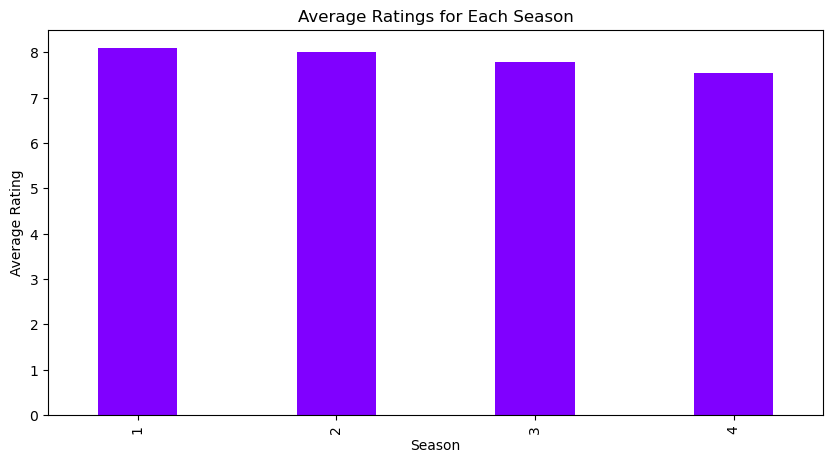

In [20]:
# Prepearing a dataframe for season wise rating using groupby

season_rating = df.groupby("season")["average rating"].mean()

# Plot: Average Ratings for Each Season
season_rating.plot(kind='bar', figsize=(10, 5), width=0.4, colormap='rainbow')
plt.title('Average Ratings for Each Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

# Get all the episode names, whose average rating is more than 8 for every season

<Axes: ylabel='Density'>

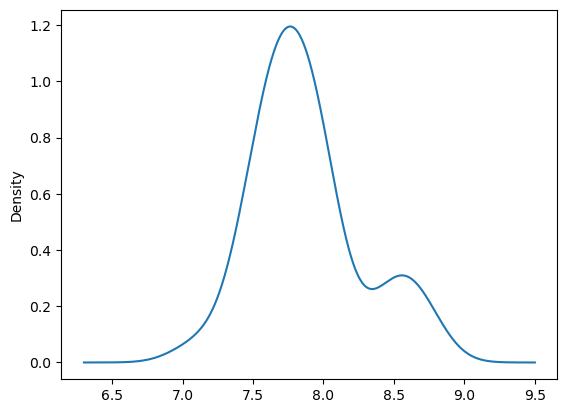

In [21]:
# Plot: Showing the distribution of average rating
df["average rating"].plot(kind='kde')

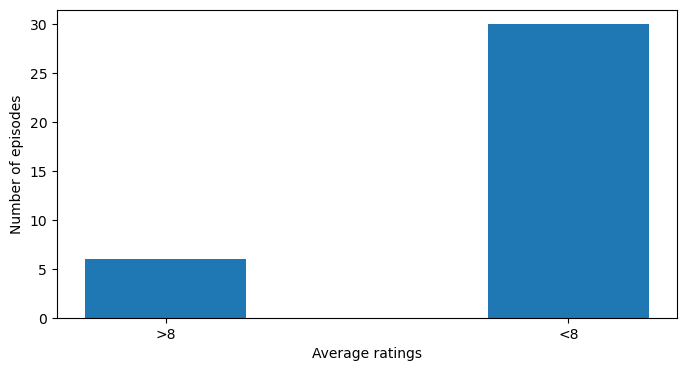

In [22]:
# Prepearing dataframe for ratings morethan and less than 8

more_than_8 = df[df["average rating"] > 8]
less_than_8 = df[df["average rating"] <= 8]

count = [len(more_than_8), len(less_than_8)]
labels = [">8", "<8"]

# Bar plot to compare the number of episodes with more that and less than 8 ratings
plt.figure(figsize=(8, 4))
plt.bar(labels, count, width=0.4)
plt.xlabel("Average ratings")
plt.ylabel("Number of episodes")
plt.show()

In [23]:
# Name of the episodes getting more than 8 ratings

more_than_8[['name', 'season', 'number', 'average rating']]

,name,season,number,average rating
6,Trompe L'Oeil,1,7,8.6
8,The Well-Tempered Clavier,1,9,8.5
9,The Bicameral Mind,1,10,8.7
17,Kiksuya,2,8,8.7
18,Vanishing Point,2,9,8.4
19,The Passenger,2,10,8.5


In [25]:
name_list = more_than_8["name"].to_list()
print(f"Episodes with average rating > 8 :\n{name_list}")

Episodes with average rating > 8 :
["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Kiksuya', 'Vanishing Point', 'The Passenger']


# Get all the episode names that aired before May 2019

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium image link    36 non-null     object 
 12  original image link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [27]:
# Coverting "airdate" column to datetime format
df["airdate"] = pd.to_datetime(df["airdate"])

# creating dataframe containing episodes aired before May 2019
before_may2019 = df[df['airdate'] < '2019-05']

before_may2019_names = before_may2019['name'].tolist()

print(f"Episodes aired before May 2019 :\n")
for i, name in enumerate(before_may2019_names):
    print(f"{i+1}. {name}")

Episodes aired before May 2019 :

1. The Original
2. Chestnut
3. The Stray
4. Dissonance Theory
5. Contrapasso
6. The Adversary
7. Trompe L'Oeil
8. Trace Decay
9. The Well-Tempered Clavier
10. The Bicameral Mind
11. Journey Into Night
12. Reunion
13. Virtù e Fortuna
14. The Riddle of the Sphinx
15. Akane No Mai
16. Phase Space
17. Les Écorchés
18. Kiksuya
19. Vanishing Point
20. The Passenger


# Get the episode name from each season with the highest and lowest rating.

In [28]:
highest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()][['name', 'average rating']])
lowest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmin()][['name', 'average rating']])
print("Episode with highest rating in each season:\n")
print(highest_rated_episodes)
print("\nEpisode with lowest rating in each season:\n")
print(lowest_rated_episodes)

Episode with highest rating in each season:

                      name  average rating
season                                    
1       The Bicameral Mind             8.7
2                  Kiksuya             8.7
3             Parce Domine             8.0
4                 Zhuangzi             7.8

Episode with lowest rating in each season:

                name  average rating
season                              
1          The Stray             7.6
2       Akane No Mai             7.6
3        Decoherence             7.5
4       The Auguries             7.1


# Get the summary for the most popular ( ratings ) episode in every season

In [29]:
popular_episode_summary = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()]['summary'])
print("Summary of the most popular episode in each season:\n")
for season, summary in enumerate(popular_episode_summary):
    print(f"Season {season+1}: {summary}\n")

Summary of the most popular episode in each season:

Season 1: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3: If you're stuck in a loop, try walking in a straight line.

Season 4: God is bored.

